<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week04/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the PIN Dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

df = pd.read_csv("https://raw.githubusercontent.com/simsekergun/MLPdatasets/main/pin_dataset1.csv")
df.head()

,t1,t2,t3,d1,d2,d3,PN,Qeff,DT,BW
0,1625,363,138,1.780000e+18,1.340000e+16,3.250000e+18,-161.121081,0.127847,119.739190,6.426738
1,1813,406,119,7.500000e+18,5.470000e+16,8.290000e+18,-161.420393,0.142941,146.779380,5.777518
2,1938,494,306,4.220000e+19,7.310000e+15,5.700000e+18,-162.376610,0.146864,113.419730,8.953805
3,1500,450,250,1.000000e+19,2.000000e+16,2.240000e+18,-162.087268,0.181376,119.203478,7.439119
4,1432,268,473,1.870000e+18,8.480000e+14,5.020000e+17,-160.281601,0.195884,125.800230,5.969470


In [2]:
df.shape      # to know no. of rows and columns

(200, 10)

In [3]:
df.isnull().sum()         # to check if there is any missing value

t1      0
t2      0
t3      0
d1      0
d2      0
d3      0
PN      0
Qeff    0
DT      0
BW      0
dtype: int64

In [4]:
df.dtypes

t1        int64
t2        int64
t3        int64
d1      float64
d2      float64
d3      float64
PN      float64
Qeff    float64
DT      float64
BW      float64
dtype: object

$\color{ForestGreen}{\text{Predict the quantum efficiency using phase noise}}$

In [5]:
# Defining the feature and the target of the model

X = df[['PN']]                 # Feature
y = df[['Qeff']]               # Target 

The linear model is now $y = \omega_1 X_1 + \omega_0$, where $X_1$ refers to `PN`. $\omega_1$ is the coefficient of regression, and the constant $\omega_0$ is the intercept (*i.e.* bias term).

In [6]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### $\color{ForestGreen}{\text{Performing Regression through }\textsf{scikit-learn}}$

In [7]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  

reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.6462 

Coefficients of Linear Model: [[-0.0290857]] 

Intercept: [-4.52400226]


In [8]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

y_pred[:10]  # Representing the Qeff prediction for the first 10 data points in test dataset

array([[0.29433772],
       [0.31366907],
       [0.42008194],
       [0.44967163],
       [0.43908034],
       [0.3398191 ],
       [0.43807007],
       [0.3034589 ],
       [0.35224422],
       [0.3565935 ]])

In [9]:
# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for test

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.6863 



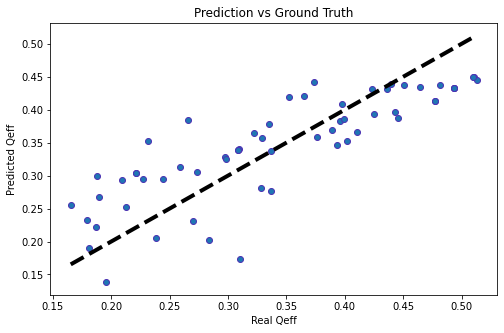

In [10]:
# Let's plot predictions vs ground truth for 'Qeff'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real Qeff')
ax.set_ylabel('Predicted Qeff')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

The closer a point in above plot is to the $y=x$ line, the more realistic the prediction for the `Qeff` is. 

We can see here that not all the points are close to the line which means the prediction is not very good.

### $\color{ForestGreen}{\text{Predict the phase noise}}$

$\color{ForestGreen}{\text{Calculating Pearson Correlation between Variables}}$


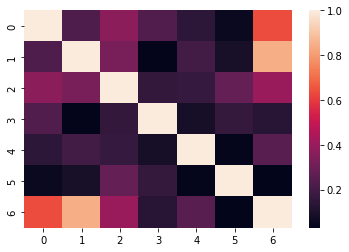

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import kendalltau   # For Kendall correlation

cols = df.columns[:7]     # List of colmuns of the dataframe

cm = np.corrcoef(df[cols].values.T)     # Calculate Pearson correlation
hm = sns.heatmap(abs(cm))
plt.show()

The above matrix shows that `t1` and `t2` have the highest correlations with the target variable `PN`. Therefore, as our first step in our regression, we identify `t1` and `t2` as the two features to explain the target `PN`. Now, let's check the Spearman correlation. This is a cross check to make sure that we have not missed any influential variable (on `PN`) that Pearson correlation hasn't been able to detect.

In [12]:
# Calculate Spearman correlation coefficient between 'PN' and each feature 
from scipy.stats import spearmanr    # For Spearman correlation

for col in cols[:-1]:
    rho, p = spearmanr(df[col].values, df['PN'].values)
    print('Spearman correlation between PN and %s is %s' %(col, round(rho, 4)))

Spearman correlation between PN and t1 is 0.6802
Spearman correlation between PN and t2 is -0.7705
Spearman correlation between PN and t3 is -0.4798
Spearman correlation between PN and d1 is 0.0351
Spearman correlation between PN and d2 is 0.2031
Spearman correlation between PN and d3 is 0.2953


It is again observed that the dominant effect comes from the two variables `t1` (with $\rho=0.6802$) and `t2` (with $\rho=-0.7705$). The Pearson and Spearman correlations agree on the role of the dominant variables.

### $\color{ForestGreen}{\text{Performing Regression through }\textsf{scikit-learn}}$

In [13]:
# Defining the features and the target of the model

X = df[cols[:2]]                # Features
y = df[['PN']]                  # Target 

In [14]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [15]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  

reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9185 

Coefficients of Linear Model: [[ 0.00240653 -0.00986512]] 

Intercept: [-161.96202025]


In [16]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

y_pred[:10]  # Representing the PN prediction for the first 10 data points in test dataset

array([[-166.42703086],
       [-165.82076695],
       [-168.96735833],
       [-171.54703017],
       [-170.07376956],
       [-167.30319243],
       [-170.73319349],
       [-166.49700325],
       [-168.39301892],
       [-166.79319063]])

In [17]:
# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for test

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.9328 



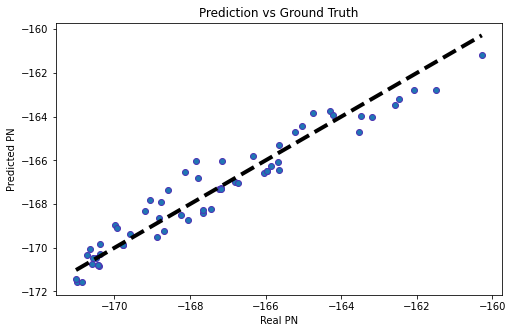

In [18]:
# Let's plot predictions vs ground truth for 'PN'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real PN')
ax.set_ylabel('Predicted PN')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

The closer a point in above plot is to the $y=x$ line, the more realistic the prediction for the `PN` is.

Here the data points are much closer to the line.

### $\color{ForestGreen}{\text{Predict the quantum efficiency}}$

$\color{ForestGreen}{\text{Calculating Pearson Correlation between Variables}}$


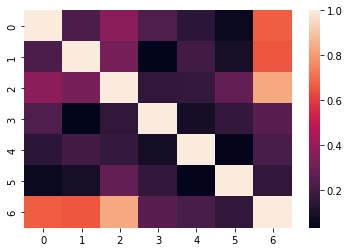

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import kendalltau   # For Kendall correlation

c = ['t1', 't2', 't3', 'd1', 'd2', 'd3', 'Qeff']

cols = df[c].columns    # List of colmuns of the dataframe

cm = np.corrcoef(df[cols].values.T)     # Calculate Pearson correlation
hm = sns.heatmap(abs(cm))  # Represent correlation by a heat map
plt.show()

The above matrix shows that `t1`, `t2` and `t3` have the highest correlations with the target variable `Qeff`. Therefore, as our first step in our regression, we identify `t1`, `t2` and `t3` as the three features to explain the target `Qeff`. Now, let's check the Spearman correlation. This is a cross check to make sure that we have not missed any inluential variable (on `Qeff`) that Pearson correlation hasn't been able to detect.

In [20]:
# Calculate Spearman correlation coefficient between 'Qeff' and each feature 
from scipy.stats import spearmanr    # For Spearman correlation

for col in cols[:-1]:
    rho, p = spearmanr(df[col].values, df['Qeff'].values)
    print('Spearman correlation between Qeff and %s is %s' %(col, round(rho, 4)))

Spearman correlation between Qeff and t1 is -0.6429
Spearman correlation between Qeff and t2 is 0.6707
Spearman correlation between Qeff and t3 is 0.8374
Spearman correlation between Qeff and d1 is -0.0406
Spearman correlation between Qeff and d2 is -0.1754
Spearman correlation between Qeff and d3 is -0.4013


It is again observed that the dominant effect comes from the three variables `t1` (with $\rho=-0.6429$), `t2` (with $\rho=0.6707$) and `t3` (with $\rho=0.8374$). The Pearson and Spearman correlations agree on the role of the dominant variables.



### $\color{ForestGreen}{\text{Performing Regression through }\textsf{scikit-learn}}$

In [21]:
# Defining the features and the target of the model

X = df[cols[:3]]                # Features
y = df[['Qeff']]               # Target 

In [22]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [23]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  

reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9801 

Coefficients of Linear Model: [[-7.21293744e-05  1.95226816e-04  1.82729618e-04]] 

Intercept: [0.14996192]


In [24]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

y_pred[:10]  # Representing the Qeff prediction for the first 10 data points in test dataset

array([[0.25414513],
       [0.24957537],
       [0.35306449],
       [0.51992451],
       [0.43019417],
       [0.30277808],
       [0.43881116],
       [0.24078971],
       [0.26053308],
       [0.31316042]])

In [25]:
# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for test

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.9799 



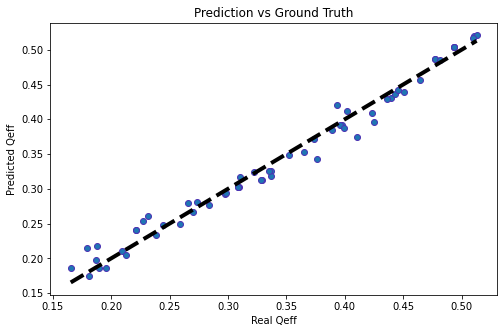

In [26]:
# Let's plot predictions vs ground truth for 'Qeff'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real Qeff')
ax.set_ylabel('Predicted Qeff')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

If we compare the above scatter plot with the scatter plot we got when we were using only `PN` as our feature variable, we will see that the data points in above scatter plot are very close to the line as compared to the first plot. The predictions for `Qeff` are much more accurate when we are using `t1`, `t2` and `t3` as target variables instead of using only `PN`.

The R^2 score was around 65% when only `PN` was considered where the R^2 score increased to 98% when `t1`, `t2` and `t3` are used.

## $\color{ForestGreen}{\text{Performing Regression through }\textsf{StatsModels}}$

An alternative to $\textsf{scikit-learn}$ library is $\textsf{StatsModels}$. We now solve the same problem using $\textsf{StatsModels}$.

In [27]:
import statsmodels.api as sm

In [28]:
XC_train = sm.add_constant(X_train) # Creating the bias term omega_0
model = sm.OLS(y_train, XC_train) # Defining model and the data into the model
results = model.fit() # Fitting the data into the model 
print('Summary:\n', results.summary()) # Printing the summary of results

Summary:
                             OLS Regression Results                            
Dep. Variable:                   Qeff   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2228.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          2.23e-115
Time:                        04:16:42   Log-Likelihood:                 401.31
No. Observations:                 140   AIC:                            -794.6
Df Residuals:                     136   BIC:                            -782.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1500      0.006     25.57

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
XC_test = sm.add_constant(X_test) # Adding bias for the test set
y_pred_sm = results.predict(XC_test) # Finding the predictions for the test set

print(y_pred_sm.values[:10],'\n') # Printing the predictions for the test set 

[0.25414513 0.24957537 0.35306449 0.51992451 0.43019417 0.30277808
 0.43881116 0.24078971 0.26053308 0.31316042] 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Let us compare the predictions of StatsModels with Scikit-learn
rd_array = np.vectorize(round) # Rounding numpy arrays 
print(rd_array(y_pred[:20].T - y_pred_sm.values[:20], 6)) # Subtract predictions of StatModels from Scikit-learn

[[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
  -0. -0.]]


The above results show that the predictions of the StatsModels are in perfect agreement with those of scikit-learn, as they should!

## $\color{ForestGreen}{\text{Performing Regression using the Exact Formula}}$

As you noticed, this dataset is not that big in size. Hence, we may find the *exact result* of regression through the exact formula we derived in the lecture: $\omega^{\mathsf{T}}=\big(\mathbb{X}^{\mathsf{T}}\mathbb{X}\big)^{-1}\,\mathbb{X}^{\mathsf{T}}\mathbb{Y}$. We can easily implement this formula into code using $\textsf{numpy}$.

In [31]:
 # Defining a function to calculate omega from X and Y
from numpy.linalg import inv # Import 'inv' to calculate inverse matrix

def exact_reg(X, Y):
  X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) # Adding a column of 1's
  OmegaT = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, Y)) # Using the exact formula
  Y_hat = np.matmul(X, OmegaT) # Predicted values of y
  return OmegaT, Y_hat

In [32]:
 # Let's compare the exact results for coefficients and intercept with the results of scikit-learn
print('The intercept and coefficients from exact formula:', exact_reg(X_train.values, y_train.values)[0],'\n')
print('The intercept and coefficients from scikit-learn:', np.insert(reg.coef_,0, reg.intercept_))

The intercept and coefficients from exact formula: [[ 1.49961919e-01]
 [-7.21293744e-05]
 [ 1.95226816e-04]
 [ 1.82729618e-04]] 

The intercept and coefficients from scikit-learn: [ 1.49961919e-01 -7.21293744e-05  1.95226816e-04  1.82729618e-04]


In [33]:
# Calculate the exact R^2 scores
y_hat_train = exact_reg(X_train.values, y_train.values)[1] # calculating predictions for train data
y_hat_test = exact_reg(X_test.values, y_test.values)[1] # calculating predictions for test data

from sklearn.metrics import r2_score
print('Exact train R^2 score = ', round(r2_score(y_train.values, y_hat_train),6), '\n')
print('Exact test R^2 score = ', round(r2_score(y_test.values, y_hat_test), 6))

Exact train R^2 score =  0.98006 

Exact test R^2 score =  0.982368


The above R<sup>2</sup> scores are in very good agreement with those obtained by $\textsf{scikit-learn}$!